# `ngsigw-results`: example usage

In [1]:
import matplotlib.pyplot as plt
from ngsigw_results import monochromatic, log_normal, broken_power_law, power_law_exp_cutoff

### simple example

(1e-16, 1e-09)

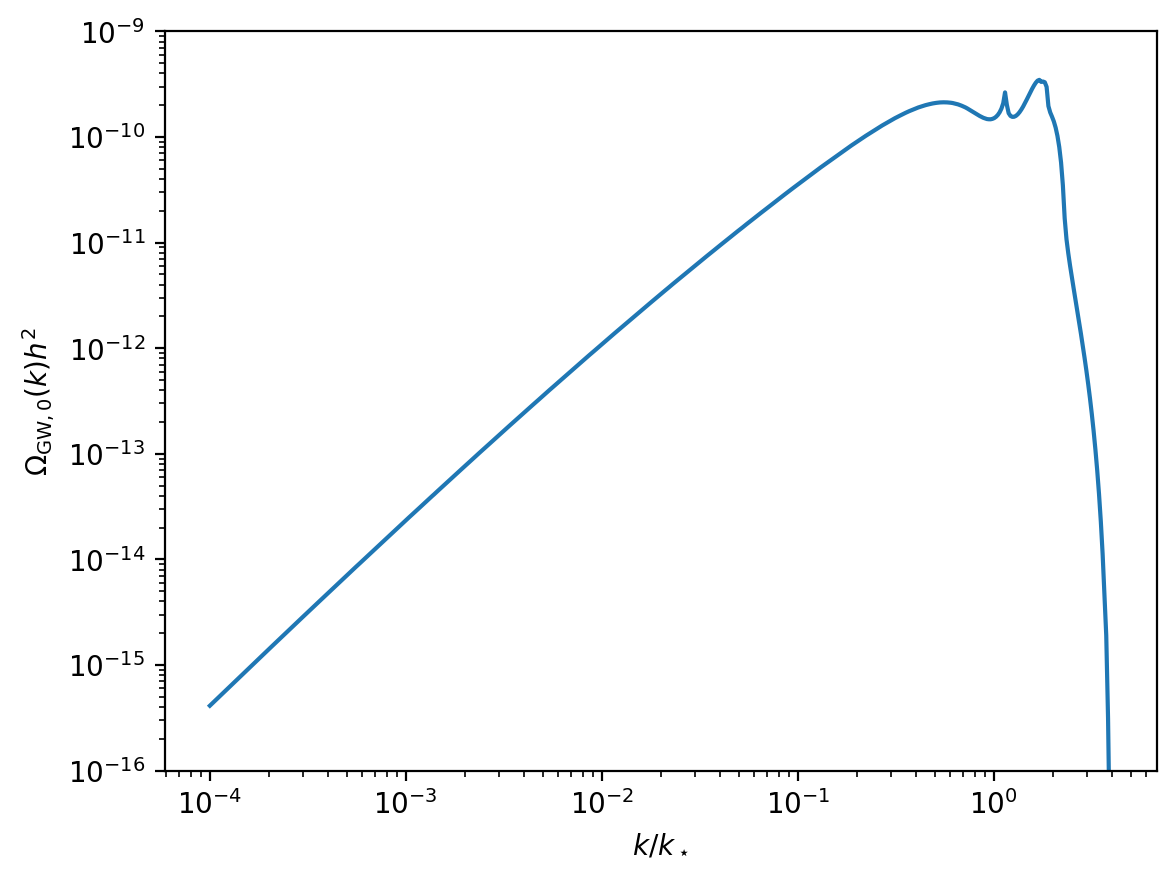

In [2]:
A_R = 1e-3
F_NL = 50
omega_r = 4.2e-5
g_star_ratio = (3.36 / 106.75)**(1/3)
gw_transfer = omega_r * g_star_ratio

fig, ax = plt.subplots()
ax.loglog(
    monochromatic.k, gw_transfer * monochromatic.omega_gw(A_R, F_NL), 
)
ax.set_ylabel(r"$\Omega_{\mathrm{GW}, 0}(k) h^2$")
ax.set_xlabel(r"$k / k_\star$")
ax.set_ylim(1e-16, 1e-9)

In [3]:
def plot_contributions(result, A_R, F_NL, omega_r=4.2e-5, 
                       g_star_ratio=(3.36 / 106.75)**(1/3)):
    gw_transfer = omega_r * g_star_ratio
    
    fig, ax = plt.subplots()
    
    ax.loglog(
        result.k, gw_transfer * result.omega_gw(A_R, F_NL), 
        color="k",
        label="total",
    )
    ax.loglog(
        result.k, gw_transfer * result.omega_gw_gaussian(A_R, F_NL),
        ls="--",
        label="Gaussian",
    )
    ax.loglog(
        result.k, gw_transfer * result.omega_gw_F_NL_2(A_R, F_NL),
        ls="--",
        label="$\mathcal{O}(F_\mathrm{NL}^2)$",
    )
    ax.loglog(
        result.k, gw_transfer * result.omega_gw_F_NL_4(A_R, F_NL),
        ls="--",
        label="$\mathcal{O}(F_\mathrm{NL}^4)$",
    )
    
    ax.set_ylabel(r"$\Omega_{\mathrm{GW}, 0}(k) h^2$")
    ax.set_xlabel(r"$k / k_\star$")
    ax.legend()

    return fig, ax

#### monochromatic spectrum

Refer to [2105.01659](https://arxiv.org/pdf/2105.01659.pdf), Section 3.1.

(1.5e-17, 1e-09)

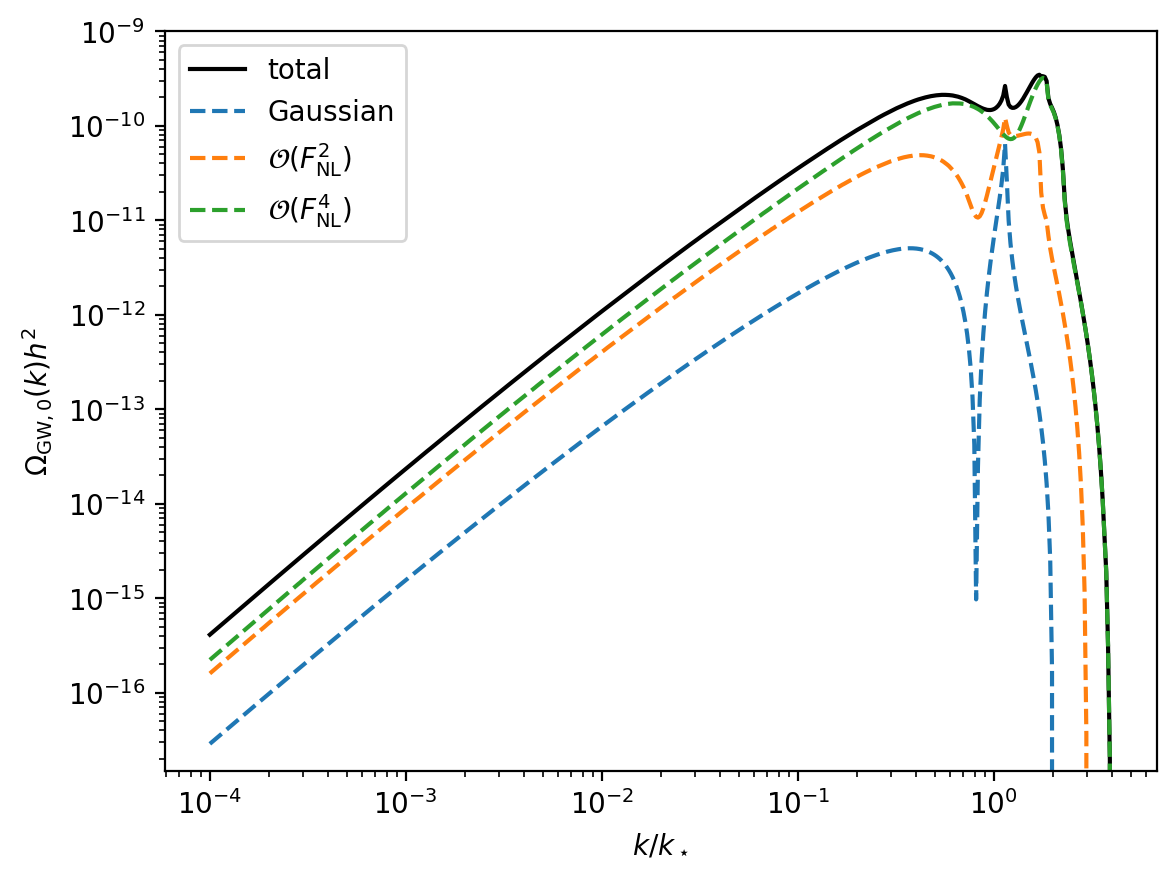

In [4]:
fig, ax = plot_contributions(monochromatic, 1e-3, 50)
ax.set_ylim(1.5e-17, 1e-9)

#### log-normal bump

Refer to [2105.01659](https://arxiv.org/pdf/2105.01659.pdf), Section 3.2. The keys in the `log_normal` dictionary denote the value of $\sigma$ in Eq. (3.4).

(1e-14, 1e-09)

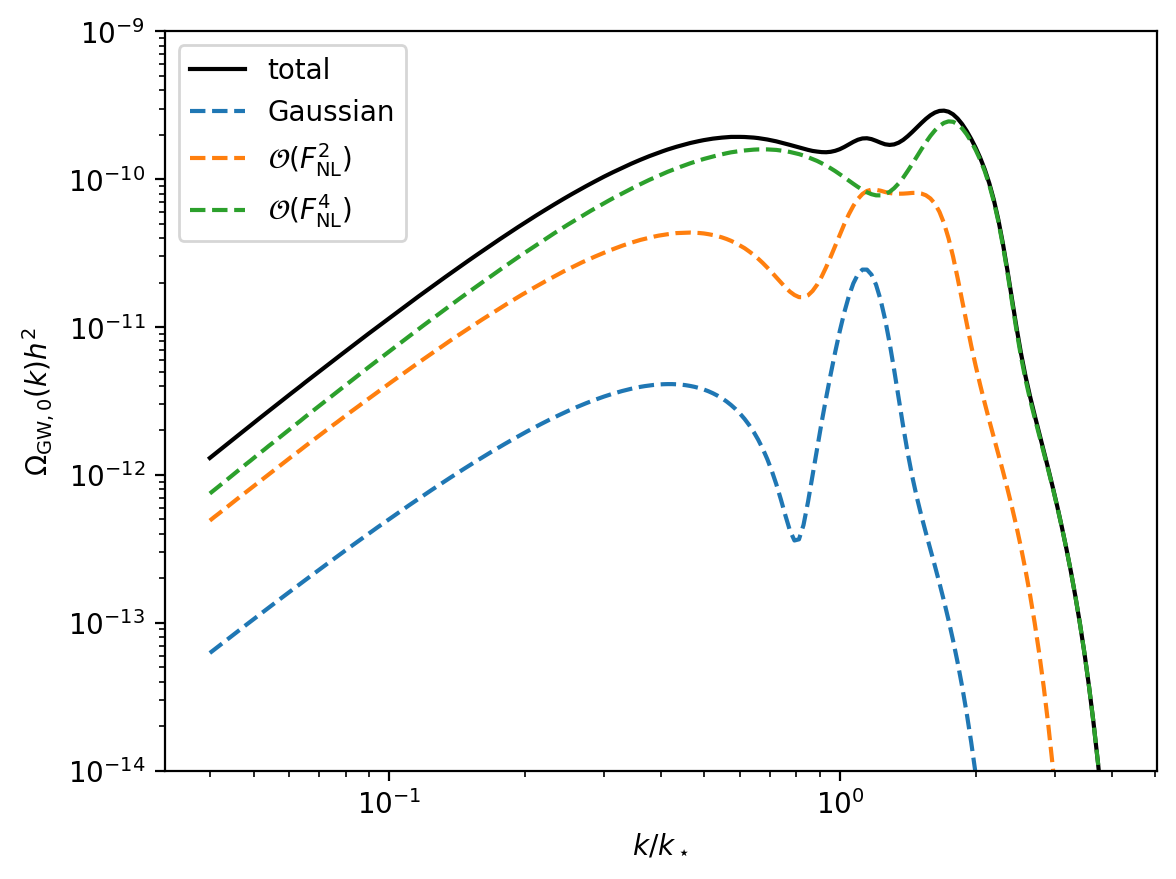

In [5]:
fig, ax = plot_contributions(log_normal[0.1], 1e-3, 50)
ax.set_ylim(1e-14, 1e-9)

comparing various $\sigma$

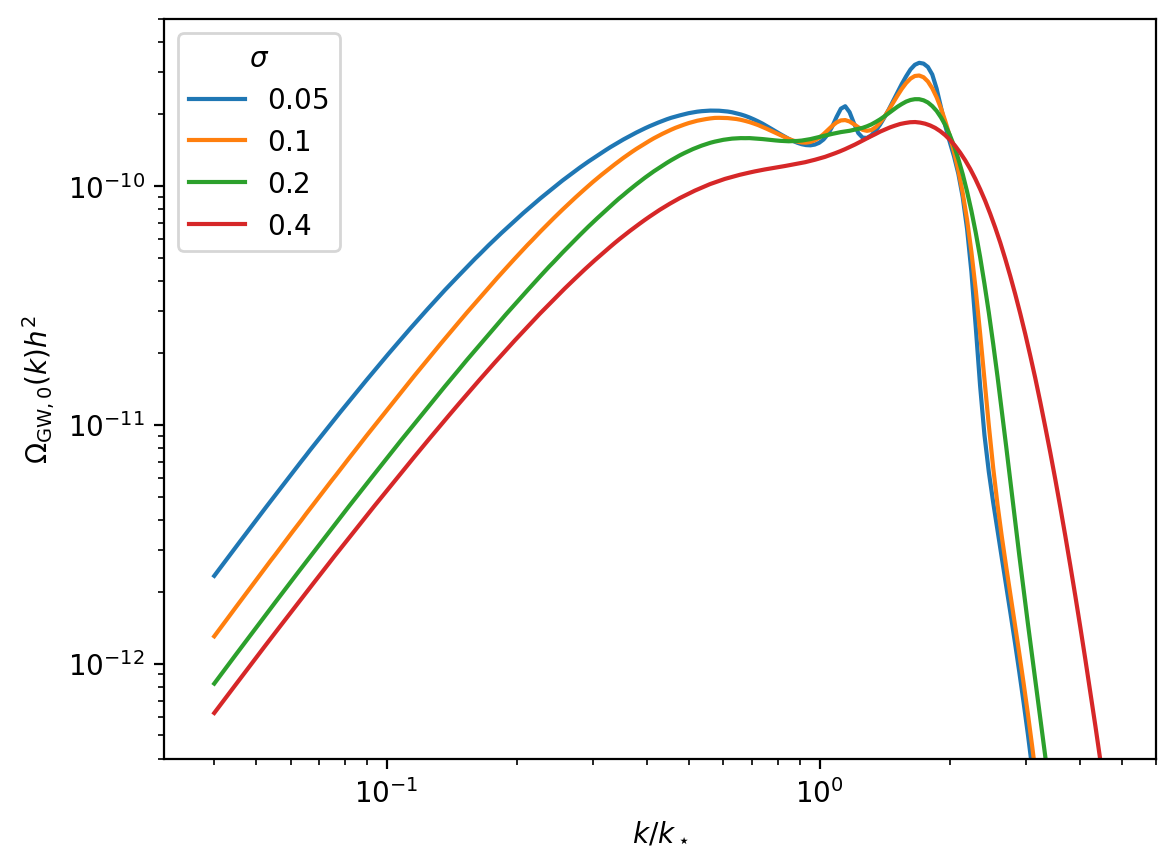

In [6]:
fig, ax = plt.subplots()

for sigma in [0.05, 0.1, 0.2, 0.4]:
    result = log_normal[sigma]
    ax.loglog(
        result.k, gw_transfer * result.omega_gw(A_R, F_NL),
        label=fr"${sigma:g}$",
    )
ax.set_ylabel(r"$\Omega_{\mathrm{GW}, 0}(k) h^2$")
ax.set_xlabel(r"$k / k_\star$")
ax.set_ylim(4e-13, 5e-10)
ax.set_xlim(xmax=6)
ax.legend(title=r"$\sigma$")

#### power law with exponential cutoff

Refer to [2105.01659](https://arxiv.org/pdf/2105.01659.pdf), Section 3.4. The keys in the `power_law_exp_cutoff` dictionary denote the value of $\alpha$ in Eq. (3.6).

In [7]:
power_law_exp_cutoff.keys()

dict_keys([2.0, 3.0, 4.0, 5.0, 6.0])

(0.02831783137536553, 14)

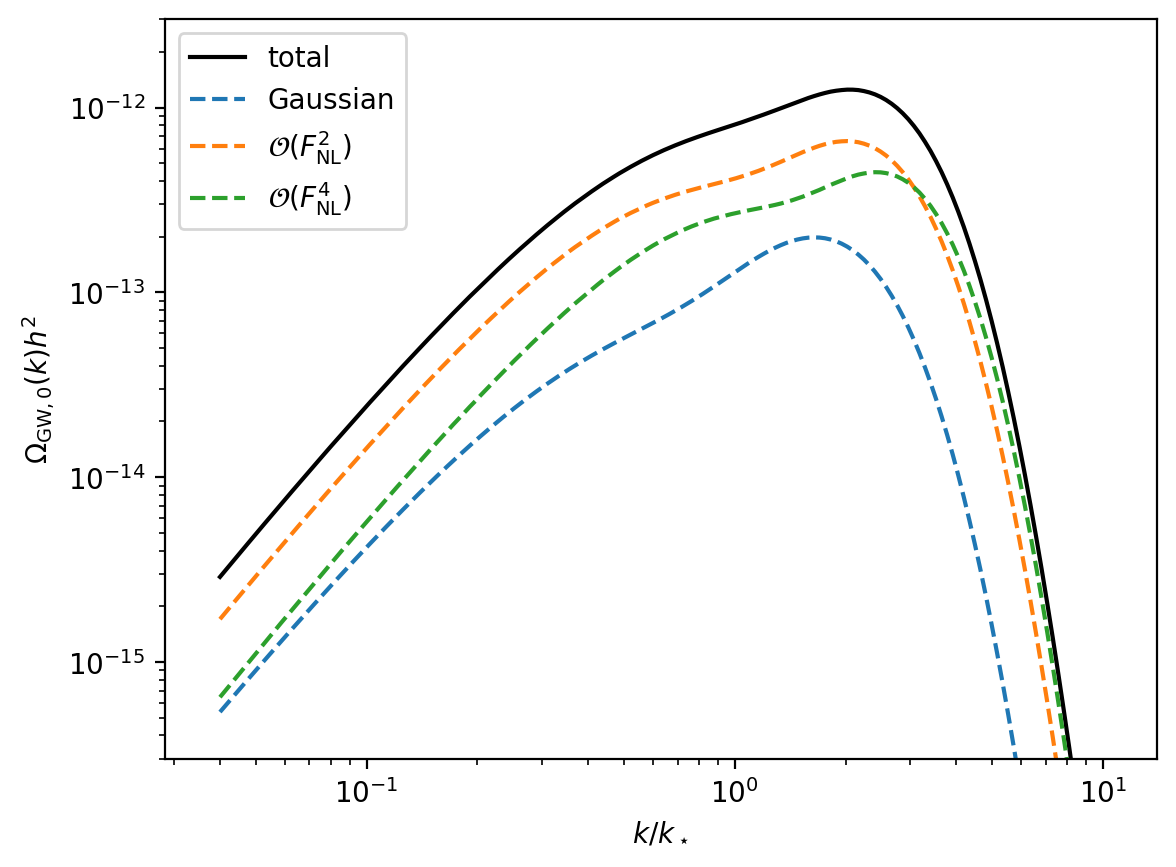

In [8]:
fig, ax = plot_contributions(power_law_exp_cutoff[3], 1e-3, 50)
ax.set_ylim(3e-16, 3e-12)
ax.set_xlim(xmax=14)

#### broken power law

Refer to [2105.01659](https://arxiv.org/pdf/2105.01659.pdf), Section 3.5. The keys in the `broken_power_law` dictionary denote the values ($\alpha$, $\beta$) in Eq. (3.7).

In [9]:
broken_power_law.keys()

dict_keys([(2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.0), (3.0, 2.0), (3.0, 3.0), (3.0, 4.0), (3.0, 5.0), (3.0, 6.0), (4.0, 2.0), (4.0, 3.0), (4.0, 4.0), (4.0, 5.0), (4.0, 6.0)])

(0.028728101607198256, 14)

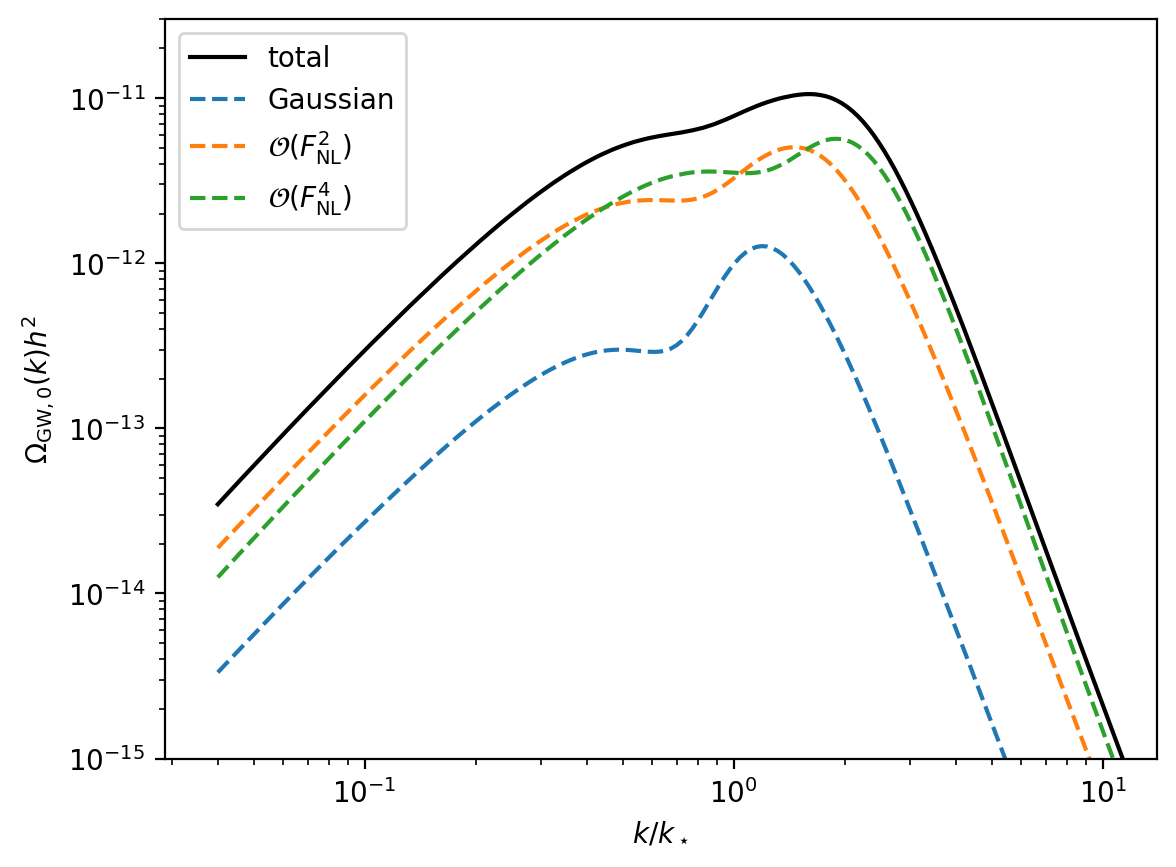

In [10]:
fig, ax = plot_contributions(broken_power_law[4, 3], 1e-3, 50)
ax.set_ylim(1e-15, 3e-11)
ax.set_xlim(xmax=14)